<a href="https://colab.research.google.com/github/ModassirIslam106/Store_Demand_Forecasting/blob/main/Demand_Forecasting_for_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/content/Demand.csv.csv')

In [41]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [8]:
df.shape

(150150, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [43]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [44]:
df[['day','month','year']] = df['week'].str.split('/',expand=True)

In [45]:
df = df.drop('week',axis = 1)

In [46]:
df.head(10)

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
5,9,8091,219009,227.2875,227.2875,0,0,18,17,01,11
6,10,8091,219029,327.0375,327.0375,0,0,47,17,01,11
7,13,8091,223245,210.9000,210.9000,0,0,50,17,01,11
8,14,8091,223153,190.2375,234.4125,1,1,82,17,01,11
9,17,8095,216418,99.0375,99.0375,0,0,99,17,01,11


**Checking model performance without any preprocessing**

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
X , y = df.drop('units_sold',axis = 1),df['units_sold']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [50]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [51]:
model.score(X_test,y_test)

0.7768342463669207

And my model is giving me 77% accuracy without any preprocessing

In [52]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)

rmse

27.05984095655539

**Exploratory Data Analysis**

In [53]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

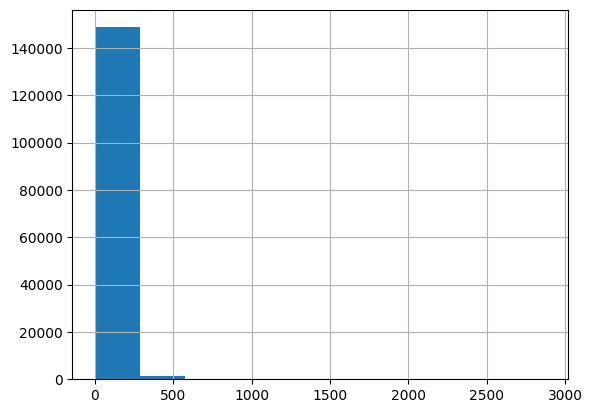

In [54]:
df.units_sold.hist()

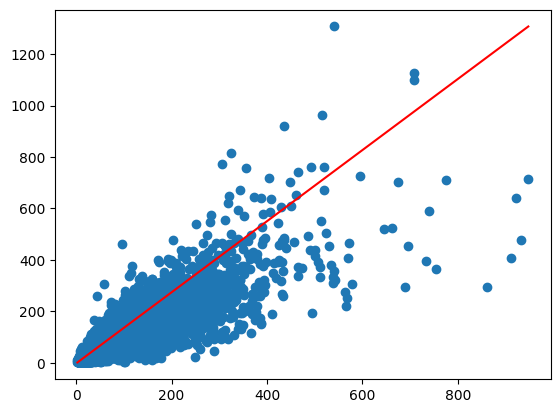

In [55]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

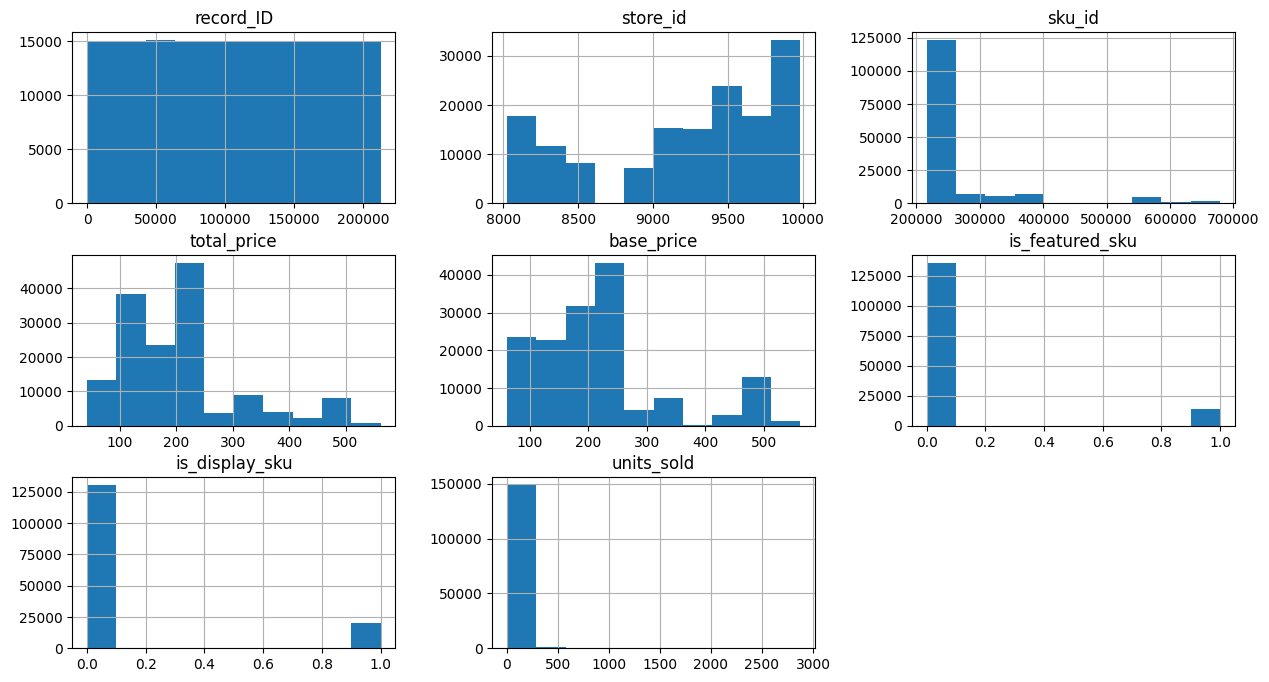

In [56]:
df.hist(figsize=(15,8))
plt.show()

In [57]:
df = df.drop('record_ID', axis = 1)

In [58]:
len(df.store_id.unique())

76

In [59]:
len(df.sku_id.unique())

28

In [60]:
df.units_sold.quantile(0.99)

np.float64(283.0)

**Applying Preprocessing to our Data**

In [61]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [35]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


<Axes: >

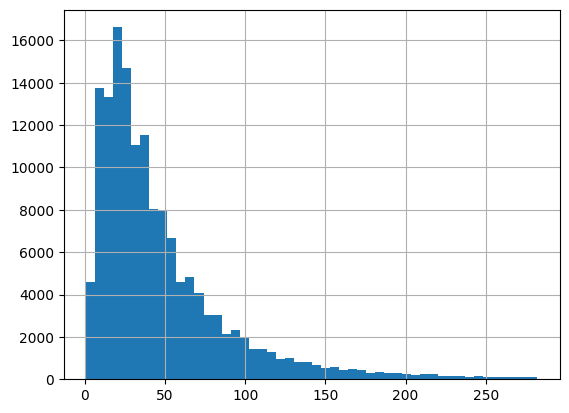

In [63]:
df.units_sold.hist(bins = 50)

In [64]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis=1)

In [65]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [67]:
model = RandomForestRegressor(n_jobs = -1)

X , y = df.drop('units_sold',axis = 1),df['units_sold']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [68]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [69]:
model.score(X_test,y_test)

0.8261275052995443

After applying preprocessing my model is giving me 82% accuracy and rmse is also good

In [70]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)

rmse

17.79934595055369

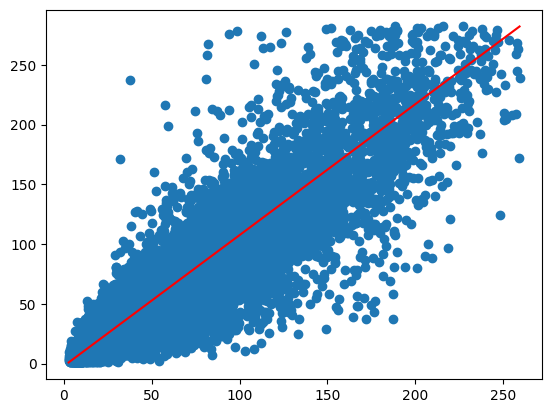

In [71]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

**Hyper Parameter Tuning**

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 3],
}

model = RandomForestRegressor(n_jobs = -1)

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.5s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.8s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  33.6s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  38.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  27.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  14.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.9s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  28.5s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  27.0s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [75]:
best_model = grid_search.best_estimator_

In [76]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [77]:
best_model.score(X_test,y_test)

0.821455834039347